# This is a EDA of Obesity Class Prediction Dataset

The aim is to understand the dataset, and clean up the dataset

From there, insights will be drawn and stastistical conclusions will be made

# Data Extraction and Checking

In [2]:
# Download the train dataset
import pandas as pd

data = pd.read_csv('data/train.csv')

In [3]:
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


The initial dataset shows a 20758 rows by 18 columns dataset with 17 features and 1 target

In [4]:
#Overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

Based on the info method, it shows that there are no nulls inside the training dataset

No imputation is needed for the dataset

# Understanding Data and Features

In [5]:
#Understanding the num and cat columns
num_df = data.drop(columns ='id').select_dtypes(include = ['number'])
cat_df = data.select_dtypes(include = ['object'])

In [6]:
num_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


In [7]:
cat_df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
20753,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,no,yes,Frequently,no,no,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_II
20756,Male,yes,yes,Sometimes,no,no,no,Automobile,Overweight_Level_II


In [8]:
# Stat breakdown of numerical features
num_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


/home/jeremiahwu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


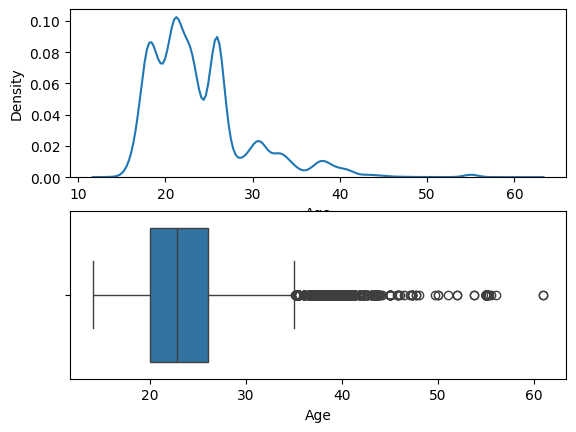

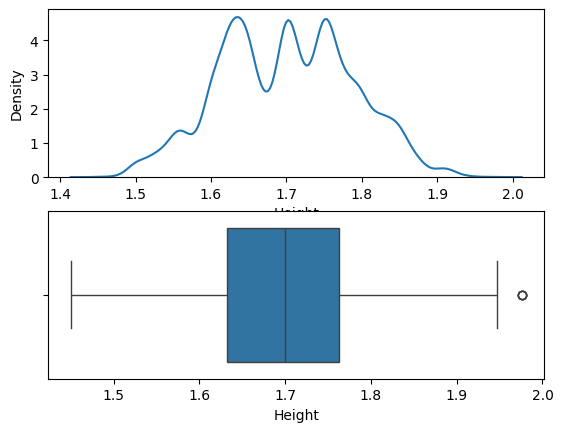

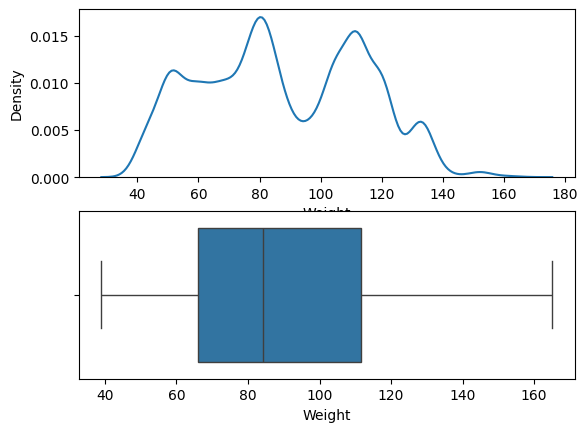

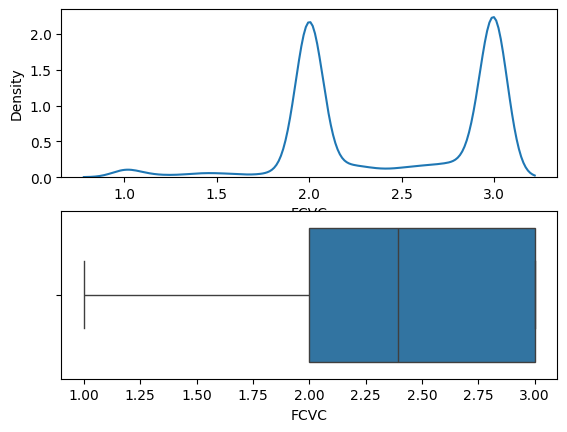

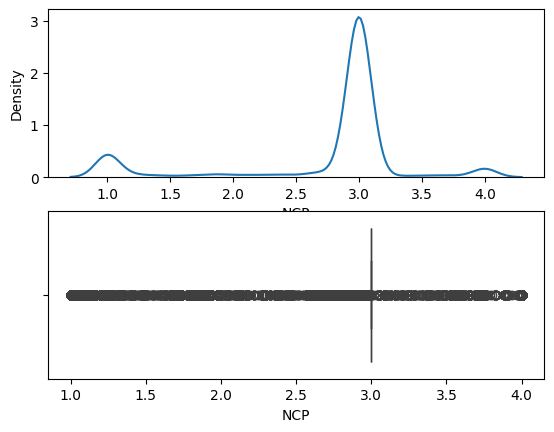

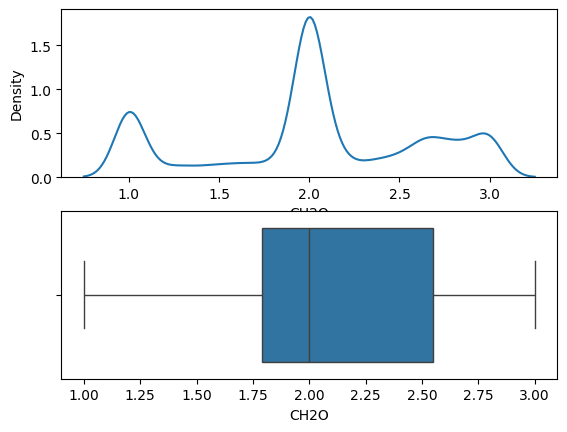

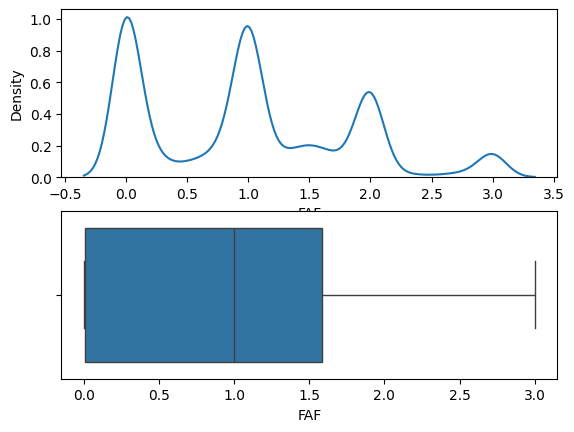

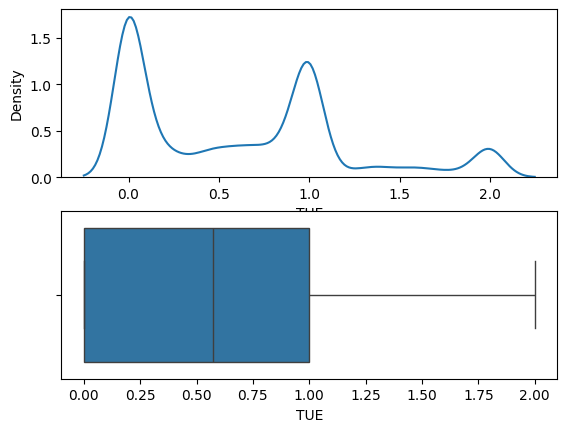

In [9]:
# Visual Understanding
import seaborn as sns
import matplotlib.pyplot as plt

for i in num_df.columns:
    plt.subplot(2,1,1)
    sns.kdeplot(num_df[i])

    plt.subplot(2,1,2)
    sns.boxplot(num_df[i],orient='h')

    plt.show()


Gender
Female    10422
Male      10336
Name: count, dtype: int64 Gender
Female    0.502071
Male      0.497929
Name: proportion, dtype: float64


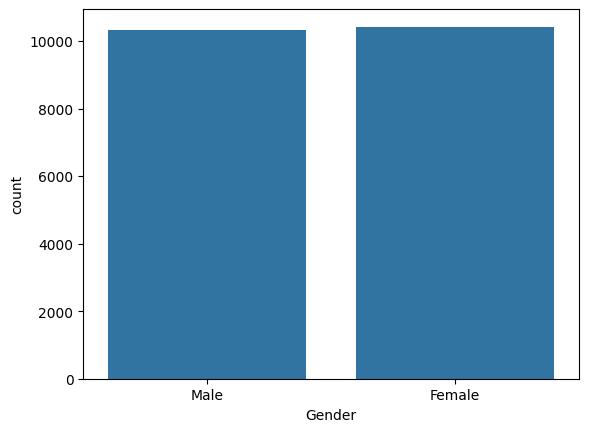

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64 family_history_with_overweight
yes    0.819636
no     0.180364
Name: proportion, dtype: float64


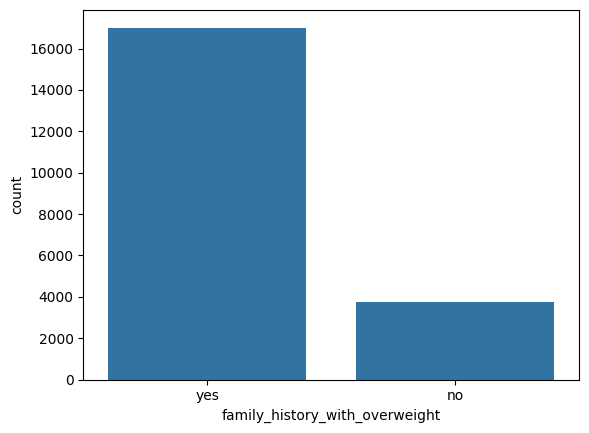

FAVC
yes    18982
no      1776
Name: count, dtype: int64 FAVC
yes    0.914443
no     0.085557
Name: proportion, dtype: float64


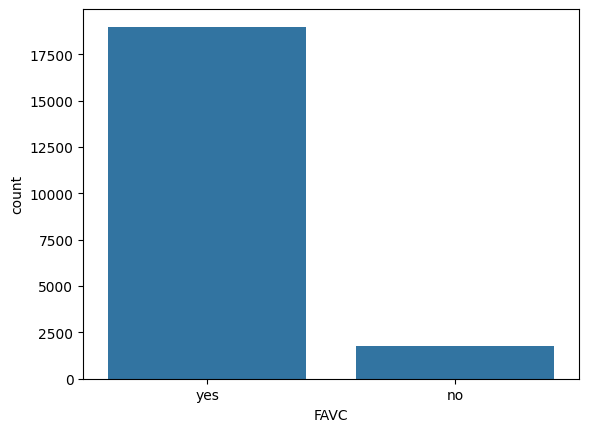

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64 CAEC
Sometimes     0.844446
Frequently    0.119087
Always        0.023027
no            0.013441
Name: proportion, dtype: float64


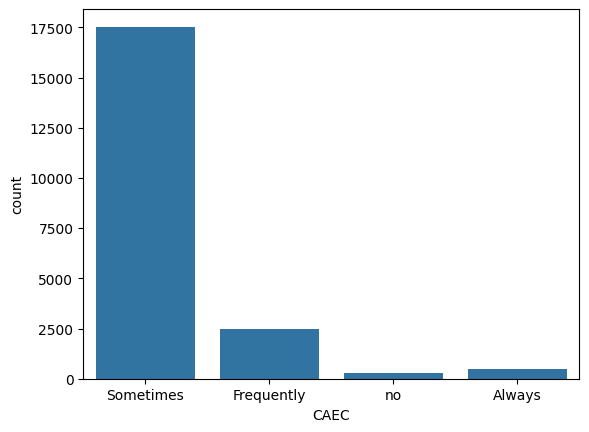

SMOKE
no     20513
yes      245
Name: count, dtype: int64 SMOKE
no     0.988197
yes    0.011803
Name: proportion, dtype: float64


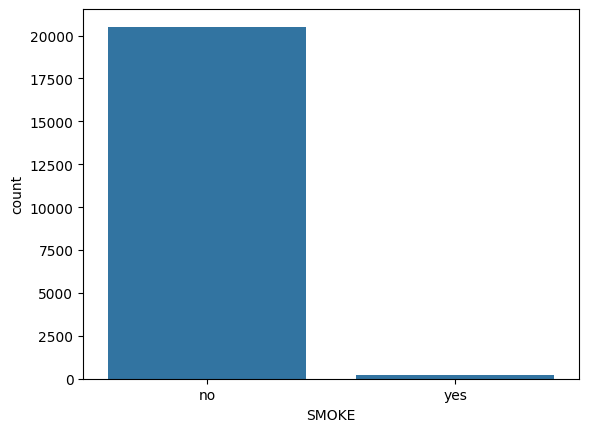

SCC
no     20071
yes      687
Name: count, dtype: int64 SCC
no     0.966904
yes    0.033096
Name: proportion, dtype: float64


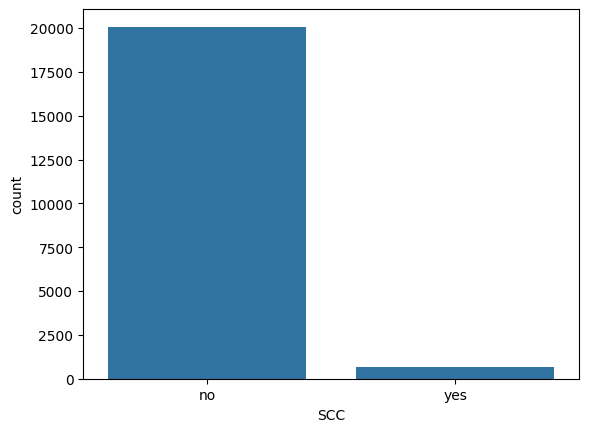

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64 CALC
Sometimes     0.725792
no            0.248723
Frequently    0.025484
Name: proportion, dtype: float64


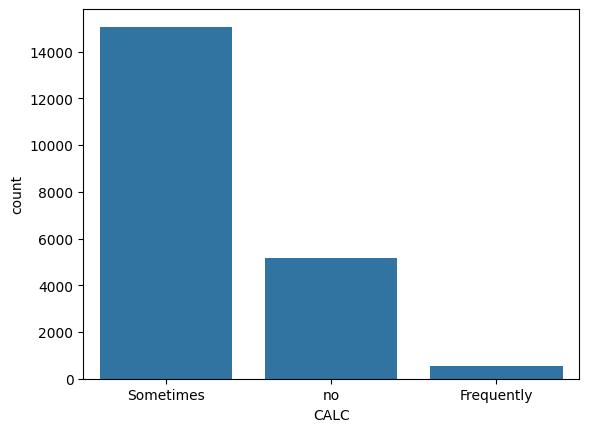

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64 MTRANS
Public_Transportation    0.803883
Automobile               0.170248
Walking                  0.022497
Motorbike                0.001831
Bike                     0.001542
Name: proportion, dtype: float64


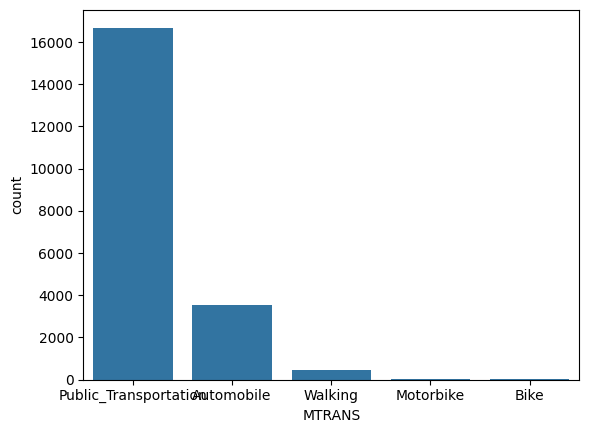

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64 NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: proportion, dtype: float64


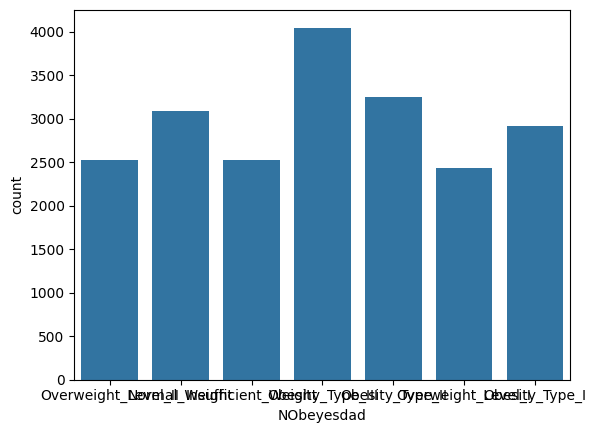

[array(['Male', 'Female'], dtype=object), array(['yes', 'no'], dtype=object), array(['yes', 'no'], dtype=object), array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object), array(['no', 'yes'], dtype=object), array(['no', 'yes'], dtype=object), array(['Sometimes', 'no', 'Frequently'], dtype=object), array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object), array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)]


In [20]:
#Breakdown of Cat features
unique_list = []
for i in cat_df.columns:
    print(cat_df[i].value_counts(), cat_df[i].value_counts(normalize = True) )
    sns.countplot(x = i, data = cat_df)
    plt.show()
    unique_list.append(cat_df[i].unique())



print(unique_list)


Based on the target and the unique method done, there are 7 options for target classification